In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import db_helper
import datetime
import networkx as nx
from datetime import datetime
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import importlib
import graph_constructor as GC
import n2v as N2V
import utils
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [3]:
PROJECT_PATH='/home/hmenn/Workspace/CSE496_Node2Vec_2018'

<img src="test.png" alt="drawing" style="width: 700px;"/>

Now, create this graph as a networkx structure.

In [4]:
g = nx.Graph()
g.add_edge('YEAR','2017', weight=1)
g.add_edge('YEAR','2016', weight=1)

################ 2016 ##############
g.add_edge('2016','6.16', weight=1)

g.add_edge('6.16','6.6.16', weight=1)
g.add_edge('6.6.16','t5-6.6.16', weight=1)
g.add_edge('u5','t5-6.6.16', weight=1)

g.add_edge('6.16','7.6.16', weight=1)
g.add_edge('7.6.16','t6-7.6.16', weight=1)
g.add_edge('u6','t6-7.6.16', weight=1)

g.add_edge('6.6.16','7.6.16', weight=1)

####################

g.add_edge('2016','7.16', weight=1)

g.add_edge('7.16','5.7.16', weight=1)
g.add_edge('5.7.16','t7-5.7.16', weight=1)
g.add_edge('u7','t7-5.7.16', weight=1)

g.add_edge('7.16','8.7.16', weight=1)
g.add_edge('8.7.16', 't8-8.7.16',weight=1)
g.add_edge('u8', 't8-8.7.16',weight=1)

g.add_edge('5.7.16','8.7.16', weight=1)

############### 2017 ###############
g.add_edge('2017','6.17', weight=1)

g.add_edge('6.17','6.6.17', weight=1)
g.add_edge('6.6.17', 't1-6.6.17',weight=1)
g.add_edge('u1','t1-6.6.17', weight=1)

g.add_edge('6.17','7.6.17', weight=1)
g.add_edge('7.6.17', 't2-7.6.17',weight=1)
g.add_edge('u2','t2-7.6.17', weight=1)

g.add_edge('6.6.17','7.6.17', weight=1)

####################

g.add_edge('2017','7.17', weight=1)

g.add_edge('7.17','5.7.17', weight=1)
g.add_edge('5.7.17', 't3-5.7.17',weight=1)
g.add_edge('u3','t3-5.7.17', weight=1)

g.add_edge('7.17','8.7.17', weight=1)
g.add_edge('8.7.17','t4-8.7.17', weight=1)
g.add_edge('u4','t4-8.7.17', weight=1)


g.add_edge('5.7.17','8.7.17', weight=1)

######## REPLY

g.add_edge('t1-6.6.17','t6-7.6.16', weight=1)

g.add_edge('u4','u6', weight=1)
g.add_edge('u6','u4', weight=1)

g.add_edge('t4-8.7.17','Ataturk', weight=1)
g.add_edge('t8-8.7.16','Ataturk', weight=1) 

####### New Copied User

g.add_edge('7.6.17','t9-7.6.17', weight=1)
g.add_edge('u9','t9-7.6.17', weight=1)
g.add_edge('t9-7.6.17','Fenerbahce', weight=1)
g.add_edge('t2-7.6.17','Fenerbahce', weight=1)

g.add_edge('7.6.17', 't10-7.6.17',weight=1)
g.add_edge('u10','t10-7.6.17', weight=1)
g.add_edge('t10-7.6.17','Ataturk', weight=1)


In [5]:
g.edges()

EdgeView([('YEAR', '2017'), ('YEAR', '2016'), ('2017', '6.17'), ('2017', '7.17'), ('2016', '6.16'), ('2016', '7.16'), ('6.16', '6.6.16'), ('6.16', '7.6.16'), ('6.6.16', 't5-6.6.16'), ('6.6.16', '7.6.16'), ('t5-6.6.16', 'u5'), ('7.6.16', 't6-7.6.16'), ('t6-7.6.16', 'u6'), ('t6-7.6.16', 't1-6.6.17'), ('u6', 'u4'), ('7.16', '5.7.16'), ('7.16', '8.7.16'), ('5.7.16', 't7-5.7.16'), ('5.7.16', '8.7.16'), ('t7-5.7.16', 'u7'), ('8.7.16', 't8-8.7.16'), ('t8-8.7.16', 'u8'), ('t8-8.7.16', 'Ataturk'), ('6.17', '6.6.17'), ('6.17', '7.6.17'), ('6.6.17', 't1-6.6.17'), ('6.6.17', '7.6.17'), ('t1-6.6.17', 'u1'), ('7.6.17', 't2-7.6.17'), ('7.6.17', 't9-7.6.17'), ('7.6.17', 't10-7.6.17'), ('t2-7.6.17', 'u2'), ('t2-7.6.17', 'Fenerbahce'), ('7.17', '5.7.17'), ('7.17', '8.7.17'), ('5.7.17', 't3-5.7.17'), ('5.7.17', '8.7.17'), ('t3-5.7.17', 'u3'), ('8.7.17', 't4-8.7.17'), ('t4-8.7.17', 'u4'), ('t4-8.7.17', 'Ataturk'), ('Ataturk', 't10-7.6.17'), ('t9-7.6.17', 'u9'), ('t9-7.6.17', 'Fenerbahce'), ('t10-7.6.17', 

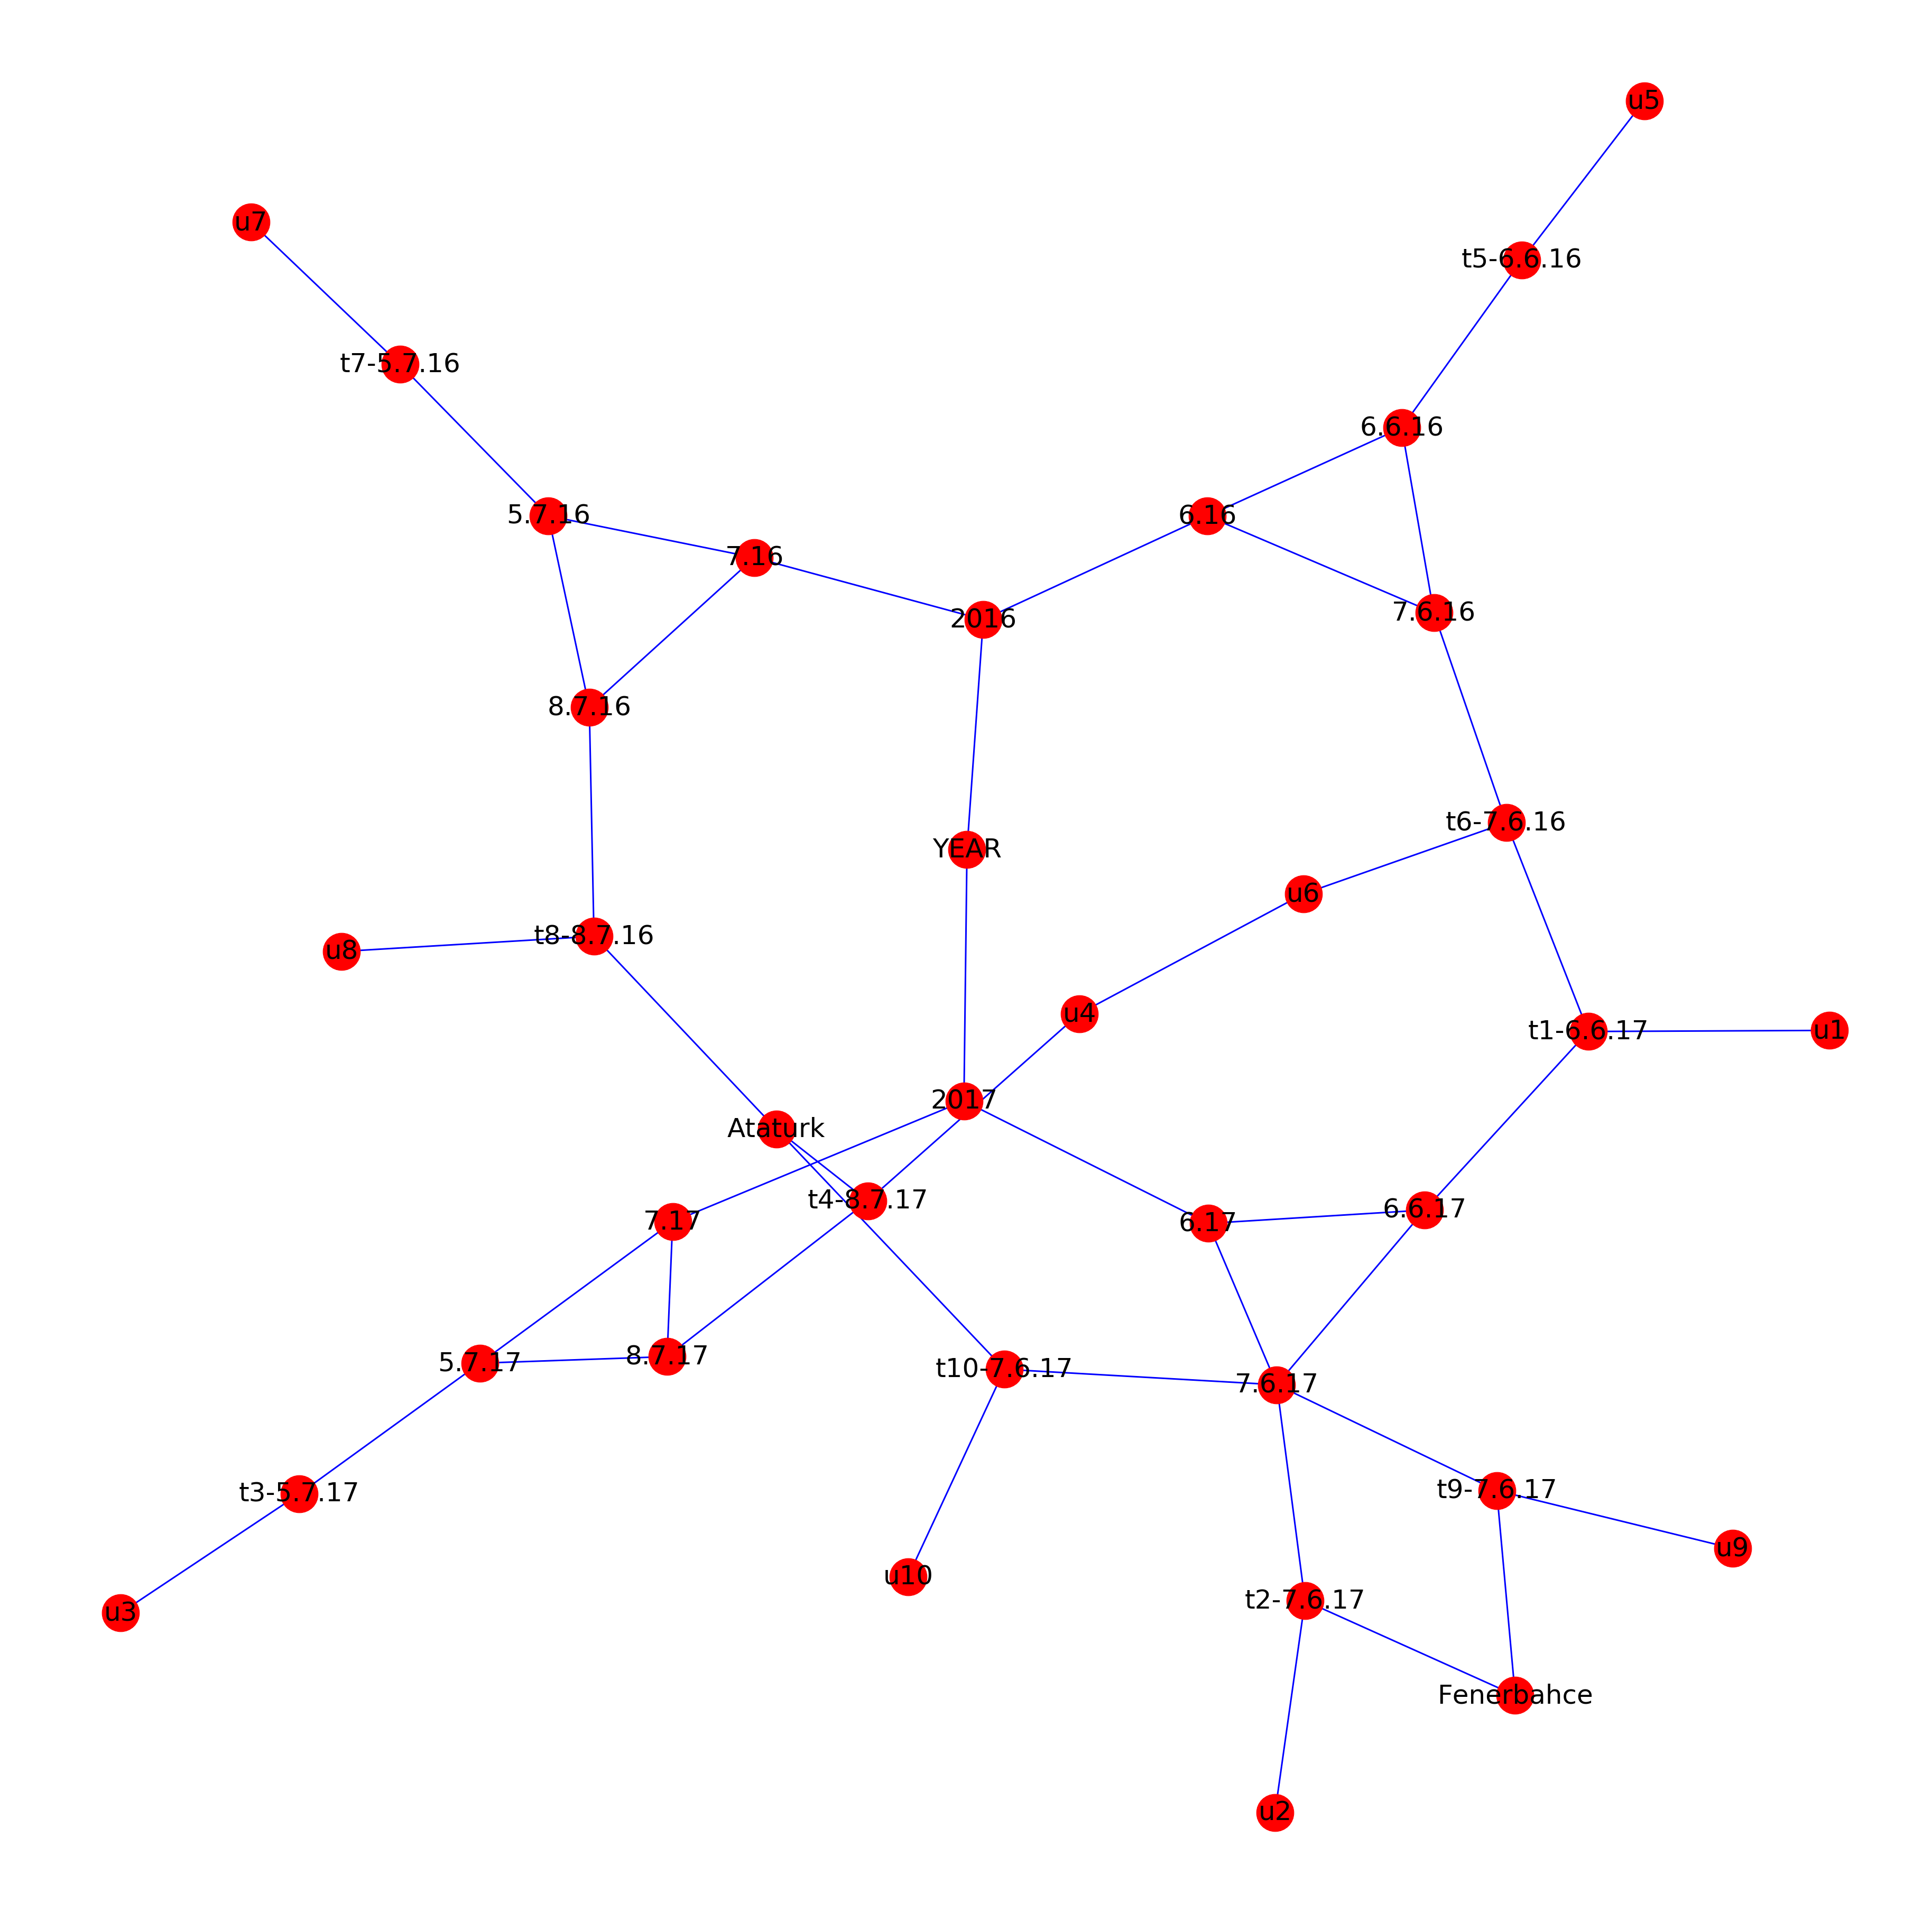

CPU times: user 4.27 s, sys: 406 ms, total: 4.68 s
Wall time: 4.2 s


In [6]:
%%time
plt.figure(1, figsize=(50,50))
nx.draw_kamada_kawai(g,node_size=5000,font_size=50,with_labels=True, width=3, edge_color="b", arrows=True, arrowsize=30)
plt.show()

In [7]:
%%time
G = N2V.Graph(g, is_directed=False, p=1.0, q=0.1)
G.preprocess_transition_probs()
walks = G.simulate_walks(1000,80)
print('Learning Embeddings...')
model = N2V.learn_embeddings(walks,'test')

Walk iteration:
1000 / 1000
Learning Embeddings...
CPU times: user 59 s, sys: 88.3 ms, total: 59.1 s
Wall time: 31.1 s


In [8]:
# t1 -t6 reply
column_names = ['t1-6.6.17','t2-7.6.17','t9-7.6.17','t10-7.6.17','t3-5.7.17','t4-8.7.17','t5-6.6.16','t6-7.6.16','t7-5.7.16','t8-8.7.16','Ataturk','Fenerbahce']
matrix1 = np.stack((model.wv[column_names]))
cosines1 = cosine_similarity(matrix1)
df1 = pd.DataFrame(cosines1, columns=column_names, index=column_names)
df1

,t1-6.6.17,t2-7.6.17,t9-7.6.17,t10-7.6.17,t3-5.7.17,t4-8.7.17,t5-6.6.16,t6-7.6.16,t7-5.7.16,t8-8.7.16,Ataturk,Fenerbahce
t1-6.6.17,1.000000,0.289849,0.335393,0.321359,0.316275,0.461074,0.497492,0.640915,0.329542,0.308128,0.369264,0.283802
t2-7.6.17,0.289849,1.000000,0.791581,0.464939,0.108620,0.248252,0.263566,0.237619,0.288499,0.350237,0.355675,0.713007
t9-7.6.17,0.335393,0.791581,1.000000,0.425238,0.108162,0.251583,0.231014,0.243658,0.309386,0.333376,0.311620,0.706778
t10-7.6.17,0.321359,0.464939,0.425238,1.000000,0.269364,0.534251,0.255194,0.327017,0.428455,0.624634,0.618970,0.409560
t3-5.7.17,0.316275,0.108620,0.108162,0.269364,1.000000,0.585642,0.273131,0.398882,0.306066,0.329164,0.409730,0.111509
t4-8.7.17,0.461074,0.248252,0.251583,0.534251,0.585642,1.000000,0.402248,0.623095,0.410956,0.569340,0.590177,0.211101
t5-6.6.16,0.497492,0.263566,0.231014,0.255194,0.273131,0.402248,1.000000,0.639490,0.370822,0.333662,0.338640,0.265333
t6-7.6.16,0.640915,0.237619,0.243658,0.327017,0.398882,0.623095,0.639490,1.000000,0.364394,0.376062,0.452435,0.237934
t7-5.7.16,0.329542,0.288499,0.309386,0.428455,0.306066,0.410956,0.370822,0.364394,1.000000,0.693420,0.516582,0.302955
t8-8.7.16,0.308128,0.350237,0.333376,0.624634,0.329164,0.569340,0.333662,0.376062,0.693420,1.000000,0.691421,0.308992


In [9]:
column_names = ['2016','2017','6.16','6.6.16','7.6.16','7.16','5.7.16','8.7.16','6.17','6.6.17','7.6.17','7.17','5.7.17','8.7.17']
matrix1 = np.stack((model.wv[column_names]))
cosines1 = cosine_similarity(matrix1)
df1 = pd.DataFrame(cosines1, columns=column_names, index=column_names)
df1

,2016,2017,6.16,6.6.16,7.6.16,7.16,5.7.16,8.7.16,6.17,6.6.17,7.6.17,7.17,5.7.17,8.7.17
2016,1.000000,0.600151,0.637705,0.633596,0.632761,0.651007,0.648202,0.614253,0.579289,0.483933,0.416806,0.577534,0.431981,0.496664
2017,0.600151,1.000000,0.595287,0.475252,0.496899,0.591646,0.488194,0.482425,0.495630,0.494431,0.391287,0.605394,0.584760,0.563910
6.16,0.637705,0.595287,1.000000,0.760179,0.691818,0.660960,0.586704,0.561162,0.605612,0.529583,0.382471,0.510626,0.384846,0.479590
6.6.16,0.633596,0.475252,0.760179,1.000000,0.739084,0.555248,0.422991,0.419541,0.449499,0.439476,0.317691,0.400734,0.314189,0.377787
7.6.16,0.632761,0.496899,0.691818,0.739084,1.000000,0.565620,0.463324,0.445138,0.495543,0.544628,0.344563,0.459137,0.359047,0.514344
7.16,0.651007,0.591646,0.660960,0.555248,0.565620,1.000000,0.779454,0.729333,0.527939,0.408170,0.413224,0.538632,0.393891,0.504871
5.7.16,0.648202,0.488194,0.586704,0.422991,0.463324,0.779454,1.000000,0.779653,0.431171,0.381370,0.404368,0.439295,0.358154,0.430827
8.7.16,0.614253,0.482425,0.561162,0.419541,0.445138,0.729333,0.779653,1.000000,0.434018,0.352623,0.435044,0.434388,0.370847,0.492723
6.17,0.579289,0.495630,0.605612,0.449499,0.495543,0.527939,0.431171,0.434018,1.000000,0.500294,0.478432,0.581171,0.509967,0.543880
6.6.17,0.483933,0.494431,0.529583,0.439476,0.544628,0.408170,0.381370,0.352623,0.500294,1.000000,0.487920,0.428699,0.360190,0.419792


In [10]:
column_names = ['u1','u2','u3','u4','u5','u6','u7','u8','u9','u10']
matrix1 = np.stack((model.wv[column_names]))
cosines1 = cosine_similarity(matrix1)
df1 = pd.DataFrame(cosines1, columns=column_names, index=column_names)
df1

,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10
u1,1.000000,0.232516,0.269006,0.505057,0.414851,0.499832,0.284971,0.265709,0.229292,0.263269
u2,0.232516,1.000000,0.121532,0.201980,0.241754,0.219646,0.282223,0.310086,0.704886,0.348432
u3,0.269006,0.121532,1.000000,0.450091,0.264987,0.383685,0.290190,0.308517,0.109102,0.242921
u4,0.505057,0.201980,0.450091,1.000000,0.439031,0.543914,0.365557,0.444767,0.156426,0.396110
u5,0.414851,0.241754,0.264987,0.439031,1.000000,0.466249,0.342105,0.303207,0.235022,0.238959
u6,0.499832,0.219646,0.383685,0.543914,0.466249,1.000000,0.351286,0.405787,0.176493,0.365109
u7,0.284971,0.282223,0.290190,0.365557,0.342105,0.351286,1.000000,0.618301,0.285467,0.386467
u8,0.265709,0.310086,0.308517,0.444767,0.303207,0.405787,0.618301,1.000000,0.272564,0.537625
u9,0.229292,0.704886,0.109102,0.156426,0.235022,0.176493,0.285467,0.272564,1.000000,0.321963
u10,0.263269,0.348432,0.242921,0.396110,0.238959,0.365109,0.386467,0.537625,0.321963,1.000000


In [11]:
import gc
gc.collect()

0